## GRUPO 2: ##
Marta Pizarro       202027959

Diego Quevedo       200914623

Alfredo Hincapié    199817792

Guillermo Andrade   202027949

Elber Pardo         200017815

# Exercise 13

The result will be evaluated from a report in Jupyter, which must be found in a public GitHub repository. The project must be carried out in the groups assigned in class. Use clear and rigorous procedures. Due date: July 29, 2021, 11:59 am (NOON), through Bloque Neón + (Upload repository link).

## Analyze class homeworks


In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_excel('../datasets/Consolidado_respuestas_escribir_v2.xlsx')
data.head()

,ID,Genero,Carrera de pregrado,Sector en el que trabaja,Edad,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E12 - Natural Language Processing Overview
0,1,M,Matemáticas,Estudio de mercados,30.0,Dentro de las diferentes aplicaciones que tien...,La principal diferencia entre las series de ti...,Los arboles de decisión son herramienta de Mac...,Al proponer un método para realizar una predic...,Durante el desarrollo de soluciones dentro de ...,La empresa kore.ai se especializa en la implem...
1,2,M,NaN,NaN,NaN,NaN,una serie de tiempo se enfoca en un individio ...,NaN,NaN,Un micro servicio es una parte de la arquitect...,NaN
2,3,M,NaN,NaN,NaN,Mercados energeticos: Tras la liberación y des...,Los datos de series de tiempo son un conjunto ...,NaN,Los metodos de ensamble nos permiten mejorar e...,Los microservicios defininen una nueva metodol...,NaN
3,4,M,Estadistica,Financiero,28.0,Las series de tiempo son una colección de obse...,Los datos de series de tiempo son un conjunto ...,Un árbol de decisión es una especie de mapa en...,Los métodos de ensamble de modelos o métodos c...,Los microservicios son tanto un estilo de arqu...,La función de autocompletar las palabras en Wh...
4,5,M,NaN,NaN,NaN,"1. Actualmente, la empresa de mascotas Laika q...",Un conjunto de datos de una serie de tiempo co...,NaN,Los modelos de ensamble consisten en mezclar l...,Los microservicios son tanto un estilo de arqu...,NaN


# Exercise 13.1

Analyze the writing patterns of each student

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from nltk.stem.snowball import SnowballStemmer

In [3]:
# Se diligencian los campos nulos con la palabra vacío con el fin de no perder los demás datos de las columnas y las filas
data = data.fillna("Vacio")

In [4]:
data.columns

Index(['ID', 'Genero', 'Carrera de pregrado', 'Sector en el que trabaja',
       'Edad', 'E1 - Examples of Time Series Analysis', 'E4 - Panel Data',
       'E6 - Decison Trees', 'E8 - Ensemble Trees Overview', 'E10 - REST-API',
       'E12 - Natural Language Processing Overview'],
      dtype='object')

Se crea una nueva columna Texto, con los datos de todas las columnas escritas

In [5]:
data["Texto"] = data["E1 - Examples of Time Series Analysis"] + " " + data["E4 - Panel Data"]+" " + data["E6 - Decison Trees"]+" " + data["E8 - Ensemble Trees Overview"]+" " + data["E10 - REST-API"]+" " +data["E12 - Natural Language Processing Overview"]
data

,ID,Genero,Carrera de pregrado,Sector en el que trabaja,Edad,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E12 - Natural Language Processing Overview,Texto
0,1,M,Matemáticas,Estudio de mercados,30.0,Dentro de las diferentes aplicaciones que tien...,La principal diferencia entre las series de ti...,Los arboles de decisión son herramienta de Mac...,Al proponer un método para realizar una predic...,Durante el desarrollo de soluciones dentro de ...,La empresa kore.ai se especializa en la implem...,Dentro de las diferentes aplicaciones que tien...
1,2,M,Vacio,Vacio,Vacio,Vacio,una serie de tiempo se enfoca en un individio ...,Vacio,Vacio,Un micro servicio es una parte de la arquitect...,Vacio,Vacio una serie de tiempo se enfoca en un indi...
2,3,M,Vacio,Vacio,Vacio,Mercados energeticos: Tras la liberación y des...,Los datos de series de tiempo son un conjunto ...,Vacio,Los metodos de ensamble nos permiten mejorar e...,Los microservicios defininen una nueva metodol...,Vacio,Mercados energeticos: Tras la liberación y des...
3,4,M,Estadistica,Financiero,28.0,Las series de tiempo son una colección de obse...,Los datos de series de tiempo son un conjunto ...,Un árbol de decisión es una especie de mapa en...,Los métodos de ensamble de modelos o métodos c...,Los microservicios son tanto un estilo de arqu...,La función de autocompletar las palabras en Wh...,Las series de tiempo son una colección de obse...
4,5,M,Vacio,Vacio,Vacio,"1. Actualmente, la empresa de mascotas Laika q...",Un conjunto de datos de una serie de tiempo co...,Vacio,Los modelos de ensamble consisten en mezclar l...,Los microservicios son tanto un estilo de arqu...,Vacio,"1. Actualmente, la empresa de mascotas Laika q..."
5,6,M,Estadística,Público,30.0,Las series de tiempo desempeñan un papel funda...,Las series tiempo son una secuencia de datos o...,Los árboles de decisión son uno de los modelos...,Vacio,Los microservicios son un tipo de arquitectura...,\nGPT-2 - OpenAI\nGenerative Pre-trained Trans...,Las series de tiempo desempeñan un papel funda...
6,7,M,Ingeniería de Sistemas,Educación,33.0,1. Predicción de precios de acciones\n2. Análi...,La diferencia entre las series de tiempo y los...,Los árboles de decisión son modelos de predicc...,Vacio,Los microservicios es una metodología de desar...,https://www.grammarly.com/\nGrammarly\nEsta ap...,1. Predicción de precios de acciones\n2. Análi...
7,8,M,Vacio,Vacio,Vacio,"Precio de acciones en la bolsa, sujeto a las t...",Una serie de tiempo es un conjunto de datos or...,Vacio,Vacio,A nivel general los Microservicios son pequeño...,Vacio,"Precio de acciones en la bolsa, sujeto a las t..."
8,9,M,Ingeniería Electrónica,Consultoría de negocios y Tecnología,44.0,Pronóstico del tiempo: Dado el comportamiento ...,La diferencia entre series de tiempo y datos p...,Los tipos de árboles de decisión se basan en e...,Hay tres razones principales por las que los m...,Los microservicios son servicios desplegados i...,La Fiscalía General de la Nación implementó en...,Pronóstico del tiempo: Dado el comportamiento ...
9,10,M,Finanzas,Fintech,25.0,1) Comportamiento del precio del dólar. Usando...,The main difference between panel data and tim...,Vacio,Los modelos de ensambles son una estrategia ex...,Un microservicio es una forma de desarrollo en...,Whale & Jaguar es una compañía que se especial...,1) Comportamiento del precio del dólar. Usando...


In [6]:
# Se define la variable X la cual va a contener los textos escritos por los estudiantes
X = data.Texto
X

0     Dentro de las diferentes aplicaciones que tien...
1     Vacio una serie de tiempo se enfoca en un indi...
2     Mercados energeticos: Tras la liberación y des...
3     Las series de tiempo son una colección de obse...
4     1. Actualmente, la empresa de mascotas Laika q...
5     Las series de tiempo desempeñan un papel funda...
6     1. Predicción de precios de acciones\n2. Análi...
7     Precio de acciones en la bolsa, sujeto a las t...
8     Pronóstico del tiempo: Dado el comportamiento ...
9     1) Comportamiento del precio del dólar. Usando...
10    1.\tUna planta lleva el conteo de su producció...
11    El primer ejemplo corresponde al registro mens...
12    1. Contactos Call Center: El número de contact...
13    Ejemplo 1: Cantidad de usuarios nuevos que se ...
14    Los siguientes son tres ejemplos en los cuales...
15    1.\tPara anticipar el futuro de una empresa ma...
16    Uno de las principales aplicaciones del anális...
17    Los análisis de las series de tiempo son ú

In [7]:
# Se usa la función CountVectorizer para crear matrices a partir de X
vect = CountVectorizer()
X_dtm = vect.fit_transform(X)

Con estos vectores se puede ver cuales son las palabras que más usan los estudiantes:

In [8]:
vect.vocabulary_

{'dentro': 1457,
 'de': 1379,
 'las': 2961,
 'diferentes': 1618,
 'aplicaciones': 344,
 'que': 4133,
 'tiene': 4905,
 'series': 4585,
 'tiempo': 4900,
 'en': 1837,
 'la': 2951,
 'vida': 5194,
 'real': 4176,
 'se': 4502,
 'encuentran': 1855,
 'como': 933,
 'el': 1796,
 'precio': 3881,
 'cualquier': 1305,
 'activo': 93,
 'lo': 3048,
 'largo': 2959,
 'estas': 2097,
 'son': 4694,
 'gran': 2512,
 'importancia': 2688,
 'dado': 1365,
 'reflejan': 4265,
 'por': 3845,
 'general': 2460,
 'mercados': 3215,
 'medio': 3181,
 'bolsas': 605,
 'valores': 5136,
 'new': 3435,
 'york': 5283,
 'tokio': 4922,
 'más': 3366,
 'localmente': 3053,
 'colombia': 894,
 'perú': 3766,
 'análisis': 330,
 'relacionado': 4294,
 'con': 1025,
 'este': 2100,
 'tipo': 4911,
 'siempre': 4607,
 'ha': 2537,
 'tenido': 4864,
 'un': 5049,
 'interés': 2885,
 'económico': 1747,
 'los': 3065,
 'volúmenes': 5234,
 'dinero': 1636,
 'están': 2148,
 'presentes': 3935,
 'importantes': 2690,
 'del': 1432,
 'mundo': 3357,
 'otra': 3613,

In [9]:
#Adicionalmente miramos cuantas palabras diferentes hay en los textos
len(vect.vocabulary_)

5322

In [10]:
# Filas son los estudiantes y columnas las palabras o features
X_dtm.shape

(38, 5322)

Adicionalmente se pueden formar ngramas, teniendo:

In [11]:
vect = CountVectorizer(ngram_range=(1, 4))
X_dtm = vect.fit_transform(X)
X_dtm.shape

(38, 106309)

In [12]:
#Se validan algunos ngramas construidos
print(vect.get_feature_names()[-51:-1])

['únicos cada microservicio tiene', 'útil', 'útil cuando', 'útil cuando se', 'útil cuando se realizan', 'útil el', 'útil el nlp', 'útil el nlp porque', 'útil es', 'útil es para', 'útil es para el', 'útil identificar', 'útil identificar en', 'útil identificar en que', 'útil los', 'útil los datos', 'útil los datos para', 'útil otra', 'útil otra técnica', 'útil otra técnica que', 'útil para', 'útil para cualquier', 'útil para cualquier caso', 'útil para el', 'útil para el lector', 'útil para grandes', 'útil para grandes aplicaciones', 'útil para intentar', 'útil para intentar pronosticar', 'útil para la', 'útil para la toma', 'útil por', 'útil por ejemplo', 'útil por ejemplo para', 'útiles', 'útiles para', 'útiles para el', 'útiles para el pronóstico', 'útiles para hacer', 'útiles para hacer pronósticos', 'útiles para predecir', 'útiles para predecir muchos', 'útiles por', 'útiles por ejemplo', 'útiles por ejemplo para', 'útiles porque', 'útiles porque permiten', 'útiles porque permiten u

In [13]:
from nltk.corpus import stopwords
spanish_stopwords = stopwords.words('spanish')
spanish_stopwords

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [14]:
#Se remueven los conectores
vect = CountVectorizer(stop_words=spanish_stopwords)
X_dtm = vect.fit_transform(X)

Se validan las palabras más usadas y cada uno de los estudiantes que la escribió, teniendo:

In [15]:
# Tabla para la frecuencia de las palabras
vect = CountVectorizer(max_features=10,min_df=35,stop_words=spanish_stopwords)
tf = pd.DataFrame(vect.fit_transform(X).toarray(), columns=vect.get_feature_names())
tf

,cada,datos,modelos,panel,puede,series,tiempo
0,9,7,5,4,4,8,9
1,5,2,1,1,2,0,1
2,6,26,13,10,4,13,15
3,11,11,7,3,7,3,8
4,1,7,7,3,1,2,10
5,6,11,2,2,7,5,16
6,3,11,3,5,2,2,7
7,6,5,0,4,4,1,10
8,1,19,5,4,10,7,12
9,6,1,4,4,2,3,3


array([[<AxesSubplot:title={'center':'cada'}>,
        <AxesSubplot:title={'center':'datos'}>,
        <AxesSubplot:title={'center':'modelos'}>],
       [<AxesSubplot:title={'center':'panel'}>,
        <AxesSubplot:title={'center':'puede'}>,
        <AxesSubplot:title={'center':'series'}>],
       [<AxesSubplot:title={'center':'tiempo'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

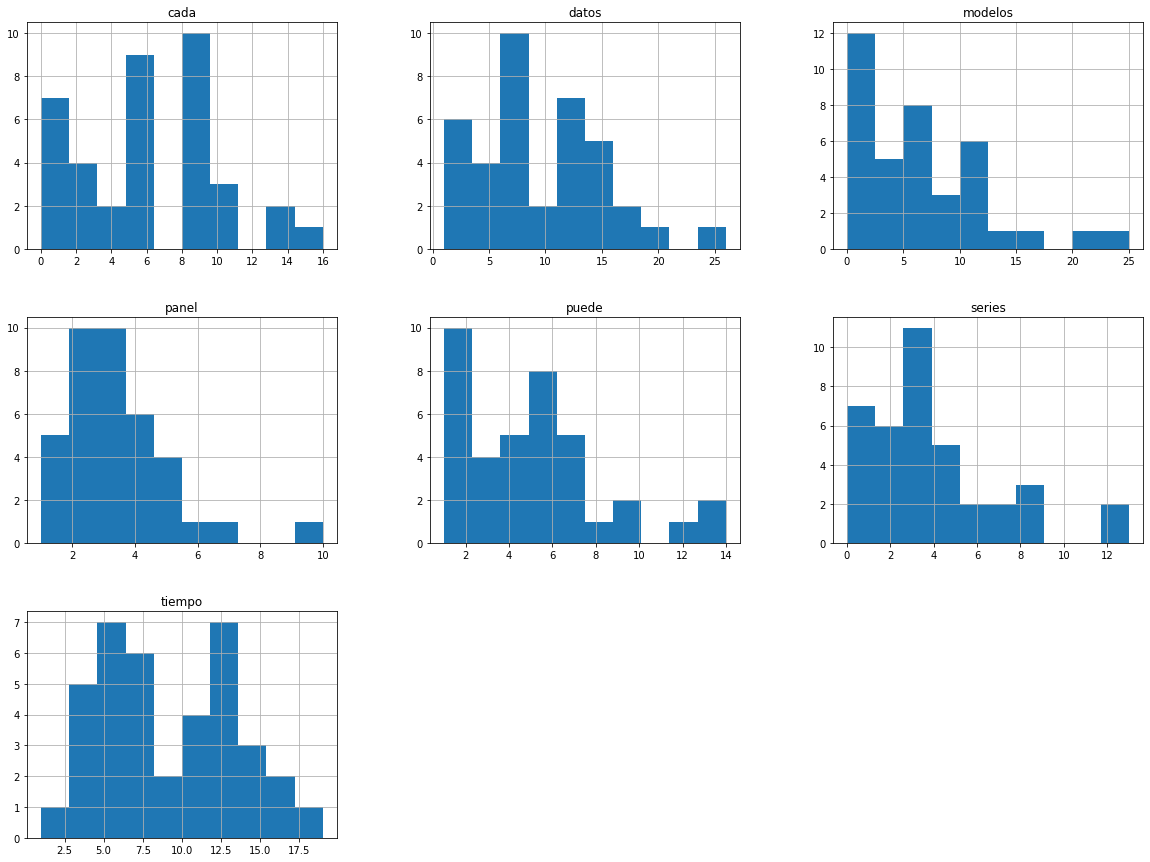

In [16]:
#Se visualiza la información en histogramas
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 15
tf.hist()

# Exercise 13.2

Create a classifier to predict the gender of each student

In [17]:
# Se valida que la columna genero tenga todos los valores completos
data['Genero'].unique()

array(['M', 'F'], dtype=object)

In [18]:
# Convertimos los datos de la columna género dejando 1 para femenino y 0 para masculino
data.Genero = [1 if each =="F" else 0 for each in data.Genero]

In [19]:
# Se define la variable a predecir
y = data.iloc[:,1].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [21]:
#Se limita el máximo número de features con el fin de tener el mismo tamaño en el set de train y el set de test
vect = CountVectorizer(max_features=2926)
X_dtm = vect.fit_transform(X_train)
X_dtmtest = vect.fit_transform(X_test)

In [22]:
X_dtm

<26x2926 sparse matrix of type '<class 'numpy.int64'>'
	with 10510 stored elements in Compressed Sparse Row format>

In [23]:
X_dtmtest

<12x2926 sparse matrix of type '<class 'numpy.int64'>'
	with 6208 stored elements in Compressed Sparse Row format>

In [24]:
# Se realiza un modelo de random forest para realizar la clasificación y predicción
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier()
pd.Series(cross_val_score(clf, X_dtm, y_train, cv=10)).describe()

C:\Users\diego\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


count    10.000000
mean      0.833333
std       0.175682
min       0.666667
25%       0.666667
50%       0.833333
75%       1.000000
max       1.000000
dtype: float64

Se evidencia una buena precisión en los datos del train, se procede a generar las predicciones con el test:

In [25]:
model_pred = clf.fit(X_dtm, y_train)

In [26]:
predclf = model_pred.predict(X_dtmtest)
predclf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
accuracy_score(y_test,predclf)

0.5833333333333334

A pesar de mostrar un buen desempeño con los datos del train, al hacer la validación con los datos de test el desempeño es bajo.

Se procede ahora a estimar un modelo con la generación de ngramas con el fin de validar si mejora el desempeño con los datos del test

In [28]:
vect = CountVectorizer(ngram_range=(1, 4), max_features=42690)
X_dtm = vect.fit_transform(X_train)
X_dtmtest = vect.fit_transform(X_test)

In [29]:
clf = RandomForestClassifier()
pd.Series(cross_val_score(clf, X_dtm, y_train, cv=10)).describe()

C:\Users\diego\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


count    10.000000
mean      0.833333
std       0.175682
min       0.666667
25%       0.666667
50%       0.833333
75%       1.000000
max       1.000000
dtype: float64

Donde muestra una precisión de 0.83 al hacer el crossvalidation con los datos de train

In [30]:
model_pred = clf.fit(X_dtm, y_train)

In [31]:
predclf = model_pred.predict(X_dtmtest)
predclf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [32]:
accuracy_score(y_test,predclf)

0.5833333333333334

Donde el resultado es el mismo que utilizando palabras, se podría obtener una mejora en el modelo si se ampliara el número de estudiantes encuestados

Por último se utilza una regresión logística, teniendo:

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
scikit_log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
model=scikit_log_reg.fit(X_dtm,y_train)

[LibLinear]

In [35]:
preds=model.predict(X_dtmtest)

In [36]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [37]:
accuracy_score(y_test,preds)

0.3333333333333333

Sin embargo se evidencia que este modelo genera un bajo desempeño y decae en la precisión de las predicciones

# Exercise 13.3

Create a classifier to predict the industry in which each student works

In [38]:
data["Sector en el que trabaja"].unique()

array(['Estudio de mercados', 'Vacio', 'Financiero', 'Público',
       'Educación', 'Consultoría  de negocios y Tecnología', 'Fintech',
       'eléctrico y de comunicaciones', 'Data Scientist - Banca',
       'Ingeniería de Software', 'Operaciones',
       'Infraestructura deTransporte', 'Cultura', 'Consumo masivo',
       'Pensiones', 'Salud', 'Consumo Masivo', 'Telecomunicaciones',
       'FINANCIERO'], dtype=object)

In [39]:
# Se realiza una unificación en los datos de la columna
data["Sector en el que trabaja"].replace(["Consumo Masivo","Fintech","FINANCIERO","Data Scientist - Banca","eléctrico y de comunicaciones"],
                                         ["Consumo masivo","Financiero","Financiero","Financiero","Telecomunicaciones"],inplace=True)

In [40]:
data["Sector en el que trabaja"].value_counts()

Financiero                               13
Vacio                                    11
Telecomunicaciones                        2
Consumo masivo                            2
Educación                                 1
Consultoría  de negocios y Tecnología     1
Operaciones                               1
Público                                   1
Ingeniería de Software                    1
Salud                                     1
Estudio de mercados                       1
Cultura                                   1
Pensiones                                 1
Infraestructura deTransporte              1
Name: Sector en el que trabaja, dtype: int64

In [41]:
#Se cambia el nombre de la columna para facilidad
data.rename(columns={"Sector en el que trabaja":"Sector"}, inplace=True)

Debido a que las clases están desbalanceadas, vamos a predecir 2 clases: Financiero=1, otros=0.  Se excluye la categoría "vacío"

In [42]:
index=data[ data['Sector'] == 'Vacio' ].index
data.drop(index, axis=0, inplace=True)
data

,ID,Genero,Carrera de pregrado,Sector,Edad,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E12 - Natural Language Processing Overview,Texto
0,1,0,Matemáticas,Estudio de mercados,30.0,Dentro de las diferentes aplicaciones que tien...,La principal diferencia entre las series de ti...,Los arboles de decisión son herramienta de Mac...,Al proponer un método para realizar una predic...,Durante el desarrollo de soluciones dentro de ...,La empresa kore.ai se especializa en la implem...,Dentro de las diferentes aplicaciones que tien...
3,4,0,Estadistica,Financiero,28.0,Las series de tiempo son una colección de obse...,Los datos de series de tiempo son un conjunto ...,Un árbol de decisión es una especie de mapa en...,Los métodos de ensamble de modelos o métodos c...,Los microservicios son tanto un estilo de arqu...,La función de autocompletar las palabras en Wh...,Las series de tiempo son una colección de obse...
5,6,0,Estadística,Público,30.0,Las series de tiempo desempeñan un papel funda...,Las series tiempo son una secuencia de datos o...,Los árboles de decisión son uno de los modelos...,Vacio,Los microservicios son un tipo de arquitectura...,\nGPT-2 - OpenAI\nGenerative Pre-trained Trans...,Las series de tiempo desempeñan un papel funda...
6,7,0,Ingeniería de Sistemas,Educación,33.0,1. Predicción de precios de acciones\n2. Análi...,La diferencia entre las series de tiempo y los...,Los árboles de decisión son modelos de predicc...,Vacio,Los microservicios es una metodología de desar...,https://www.grammarly.com/\nGrammarly\nEsta ap...,1. Predicción de precios de acciones\n2. Análi...
8,9,0,Ingeniería Electrónica,Consultoría de negocios y Tecnología,44.0,Pronóstico del tiempo: Dado el comportamiento ...,La diferencia entre series de tiempo y datos p...,Los tipos de árboles de decisión se basan en e...,Hay tres razones principales por las que los m...,Los microservicios son servicios desplegados i...,La Fiscalía General de la Nación implementó en...,Pronóstico del tiempo: Dado el comportamiento ...
9,10,0,Finanzas,Financiero,25.0,1) Comportamiento del precio del dólar. Usando...,The main difference between panel data and tim...,Vacio,Los modelos de ensambles son una estrategia ex...,Un microservicio es una forma de desarrollo en...,Whale & Jaguar es una compañía que se especial...,1) Comportamiento del precio del dólar. Usando...
12,13,0,Ingeniería Electrónica,Financiero,28.0,1. Contactos Call Center: El número de contact...,Diferencia: La diferencia entre datos panel y ...,Problemas de tipo regresión\n\nÁrboles de Tipo...,Los modelos de ensamble son una técnica de Mac...,Los microservicios son un tipo de arquitectura...,PhotoMath: Es una aplicación que utiliza la cá...,1. Contactos Call Center: El número de contact...
13,14,1,Ingeniería Industrial y economía,Financiero,29.0,Ejemplo 1: Cantidad de usuarios nuevos que se ...,La diferencia principal de los datos panel y l...,Los algoritmos arboles de decisión son métodos...,La técnica o método de ensamblaje es una estra...,Teniendo en cuenta la introducción al tema pub...,El procesamiento de lenguaje natural hace part...,Ejemplo 1: Cantidad de usuarios nuevos que se ...
14,15,1,Estadística,Telecomunicaciones,31.0,Los siguientes son tres ejemplos en los cuales...,En series de tiempo se analiza solo una variab...,Vacio,Vacio,Los microservicios son una herramientas desarr...,Producto NLP: Neuro Ad Testing – Nielsen\n\nEs...,Los siguientes son tres ejemplos en los cuales...
15,16,0,Ingenieria Industrial,Financiero,49.0,1.\tPara anticipar el futuro de una empresa ma...,Una serie de tiempo corresponde a un conjunto ...,Los árboles de decisión son modelos predictivo...,Muchos problemas de machine learning pueden se...,Los términos RESTful API y Microservices van d...,Watson Annotator for Clinical Data extrae con...,1.\tPara anticipar el futuro de una empresa ma...


In [43]:
# Convertimos los datos de la columna sector en el que trabaja dejando 1 para financiero y 0 para los demás
data.Sector = [1 if each =="Financiero" else 0 for each in data.Sector]

In [44]:
data

,ID,Genero,Carrera de pregrado,Sector,Edad,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E12 - Natural Language Processing Overview,Texto
0,1,0,Matemáticas,0,30.0,Dentro de las diferentes aplicaciones que tien...,La principal diferencia entre las series de ti...,Los arboles de decisión son herramienta de Mac...,Al proponer un método para realizar una predic...,Durante el desarrollo de soluciones dentro de ...,La empresa kore.ai se especializa en la implem...,Dentro de las diferentes aplicaciones que tien...
3,4,0,Estadistica,1,28.0,Las series de tiempo son una colección de obse...,Los datos de series de tiempo son un conjunto ...,Un árbol de decisión es una especie de mapa en...,Los métodos de ensamble de modelos o métodos c...,Los microservicios son tanto un estilo de arqu...,La función de autocompletar las palabras en Wh...,Las series de tiempo son una colección de obse...
5,6,0,Estadística,0,30.0,Las series de tiempo desempeñan un papel funda...,Las series tiempo son una secuencia de datos o...,Los árboles de decisión son uno de los modelos...,Vacio,Los microservicios son un tipo de arquitectura...,\nGPT-2 - OpenAI\nGenerative Pre-trained Trans...,Las series de tiempo desempeñan un papel funda...
6,7,0,Ingeniería de Sistemas,0,33.0,1. Predicción de precios de acciones\n2. Análi...,La diferencia entre las series de tiempo y los...,Los árboles de decisión son modelos de predicc...,Vacio,Los microservicios es una metodología de desar...,https://www.grammarly.com/\nGrammarly\nEsta ap...,1. Predicción de precios de acciones\n2. Análi...
8,9,0,Ingeniería Electrónica,0,44.0,Pronóstico del tiempo: Dado el comportamiento ...,La diferencia entre series de tiempo y datos p...,Los tipos de árboles de decisión se basan en e...,Hay tres razones principales por las que los m...,Los microservicios son servicios desplegados i...,La Fiscalía General de la Nación implementó en...,Pronóstico del tiempo: Dado el comportamiento ...
9,10,0,Finanzas,1,25.0,1) Comportamiento del precio del dólar. Usando...,The main difference between panel data and tim...,Vacio,Los modelos de ensambles son una estrategia ex...,Un microservicio es una forma de desarrollo en...,Whale & Jaguar es una compañía que se especial...,1) Comportamiento del precio del dólar. Usando...
12,13,0,Ingeniería Electrónica,1,28.0,1. Contactos Call Center: El número de contact...,Diferencia: La diferencia entre datos panel y ...,Problemas de tipo regresión\n\nÁrboles de Tipo...,Los modelos de ensamble son una técnica de Mac...,Los microservicios son un tipo de arquitectura...,PhotoMath: Es una aplicación que utiliza la cá...,1. Contactos Call Center: El número de contact...
13,14,1,Ingeniería Industrial y economía,1,29.0,Ejemplo 1: Cantidad de usuarios nuevos que se ...,La diferencia principal de los datos panel y l...,Los algoritmos arboles de decisión son métodos...,La técnica o método de ensamblaje es una estra...,Teniendo en cuenta la introducción al tema pub...,El procesamiento de lenguaje natural hace part...,Ejemplo 1: Cantidad de usuarios nuevos que se ...
14,15,1,Estadística,0,31.0,Los siguientes son tres ejemplos en los cuales...,En series de tiempo se analiza solo una variab...,Vacio,Vacio,Los microservicios son una herramientas desarr...,Producto NLP: Neuro Ad Testing – Nielsen\n\nEs...,Los siguientes son tres ejemplos en los cuales...
15,16,0,Ingenieria Industrial,1,49.0,1.\tPara anticipar el futuro de una empresa ma...,Una serie de tiempo corresponde a un conjunto ...,Los árboles de decisión son modelos predictivo...,Muchos problemas de machine learning pueden se...,Los términos RESTful API y Microservices van d...,Watson Annotator for Clinical Data extrae con...,1.\tPara anticipar el futuro de una empresa ma...


In [45]:
index=data[ data['Sector'] == 'Vacio' ].index
data.drop(index, axis=0, inplace=True)

In [46]:
X=data.Texto

In [47]:
y = data.iloc[:,3].values
y  

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1], dtype=int64)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [49]:
#Se limita el máximo número de features con el fin de tener el mismo tamaño en el set de train y el set de test
vect = CountVectorizer(max_features=2483)
X_dtm = vect.fit_transform(X_train)
X_dtmtest = vect.fit_transform(X_test)

In [50]:
X_dtm

<18x2483 sparse matrix of type '<class 'numpy.int64'>'
	with 8016 stored elements in Compressed Sparse Row format>

In [51]:
X_dtmtest

<9x2483 sparse matrix of type '<class 'numpy.int64'>'
	with 4701 stored elements in Compressed Sparse Row format>

In [52]:
clf = RandomForestClassifier()
pd.Series(cross_val_score(clf, X_dtm, y_train, cv=10)).describe()

C:\Users\diego\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


count    10.000000
mean      0.650000
std       0.241523
min       0.500000
25%       0.500000
50%       0.500000
75%       0.875000
max       1.000000
dtype: float64

Donde la precisión usando cross validation en el train es de 0.65

In [53]:
model_pred = clf.fit(X_dtm, y_train)

In [54]:
predclf = model_pred.predict(X_dtmtest)
predclf

array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [55]:
accuracy_score(y_test,predclf)

0.4444444444444444

Teniendo una precisión en test muy baja, esto se puede deber a la poca cantidad de estudiantes en el set de datos, teniendo en cuenta que se quitaron los que dejaron el sector donde trabajan sin diligenciar

In [57]:
# Se realiza una prueba usando ngramas y omitiendo las stopwords
vect = CountVectorizer(ngram_range=(1, 3),max_features=14892,stop_words=spanish_stopwords)
X_dtm = vect.fit_transform(X_train)
X_dtmtest = vect.fit_transform(X_test)

In [58]:
model_pred = clf.fit(X_dtm, y_train)

In [59]:
predclf = model_pred.predict(X_dtmtest)
predclf

array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [60]:
accuracy_score(y_test,predclf)

0.4444444444444444

Sin embargo el resultado no mejora

Por último se ejecuta también un modelo de regresión logística:

In [61]:
scikit_log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
model=scikit_log_reg.fit(X_dtm,y_train)

[LibLinear]

In [62]:
preds=model.predict(X_dtmtest)

In [63]:
preds

array([0, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [64]:
accuracy_score(y_test,preds)

0.5555555555555556

Donde se obtuvo un mejor desempeño que con el modelo de random forest

# Conclusiones

-Se presentaron inconvenientes con la data, principalmente por la poca información que se tenía y adicionalmente varios campos se presentaron con valores nulos.

-Intentar hacer una clasificación usando NPL es un tema complejo donde se tienen que calibrar los modelos con varios parámetros con el fin de intentar mejorar el resultado y se evidencia, como se mencionó en la clase, que es necesario contar con muchos datos para que la calibración llegue a ser efectiva.